# Instructions for the N 157B Model
In the lecture we have discussed a straight power law and a power law with an exponential cut-off. Looking at the naima documentation (https://naima.readthedocs.io/en/latest/api-models.html) you will find that there are further models, including a broken power law. A broken power law are just two power laws connecting at the break energy. But for N 157B we need a model with two breaks. Here you will get some instructions how to implement such a model.

First of all, we need to import a few modules:

In [35]:
import astropy.units as u

import numpy as np

import matplotlib.pyplot as plt

from naima.models import Synchrotron
from naima.models import PowerLaw, BrokenPowerLaw, TableModel

Let's define a few parameters: E_min and E_max are the minimal and maximal energy. E_1 is the intrinsic break and E_2 is the cooling break. p_1, p_2 and p_3 are the spectral indices. Here are some example values, you will need to change this to the values of the model you are using.

In [4]:
E_min = 511 * u.keV
E_max = 1e15 *u.eV

E_1 = 10 * u.GeV    # you need to change this value
E_2 = 1 * u.TeV     # you need to change this value

p_1 = 1.    #  you need to change this value
p_2 = 2.    #  you need to change this value
p_3 = 3.    #  you need to change this value

Finally we need a value for the amplitude. We can use any value. The amplitude will change anyway when we set the total energy.

In [5]:
A = 1./u.TeV

Let's start with a broken power law and build the first two parts of our spectrum.

In [18]:
model1 = BrokenPowerLaw(amplitude = A, e_0 = 1*u.TeV, e_break = E_1, alpha_1 = p_1, alpha_2 = p_2)

This function should describe our model for energies in the range E_min to the second break, E_2. Let's define an energy range for this:

In [19]:
energies1 = np.logspace(np.log10(E_min.to(u.TeV).value), np.log10(E_2.to(u.TeV).value), 100) *u.TeV

In [20]:
energies1

<Quantity [5.11000000e-07, 5.91523774e-07, 6.84736547e-07, 7.92637860e-07,
           9.17542345e-07, 1.06212938e-06, 1.22950054e-06, 1.42324619e-06,
           1.64752242e-06, 1.90714027e-06, 2.20766890e-06, 2.55555507e-06,
           2.95826141e-06, 3.42442653e-06, 3.96405030e-06, 4.58870840e-06,
           5.31180061e-06, 6.14883825e-06, 7.11777692e-06, 8.23940170e-06,
           9.53777298e-06, 1.10407426e-05, 1.27805513e-05, 1.47945205e-05,
           1.71258524e-05, 1.98245574e-05, 2.29485265e-05, 2.65647730e-05,
           3.07508704e-05, 3.55966163e-05, 4.12059585e-05, 4.76992253e-05,
           5.52157060e-05, 6.39166395e-05, 7.39886729e-05, 8.56478650e-05,
           9.91443216e-05, 1.14767560e-04, 1.32852721e-04, 1.53787755e-04,
           1.78021748e-04, 2.06074553e-04, 2.38547940e-04, 2.76138508e-04,
           3.19652627e-04, 3.70023734e-04, 4.28332360e-04, 4.95829303e-04,
           5.73962468e-04, 6.64407916e-04, 7.69105828e-04, 8.90302117e-04,
           1.03059661e-03

Let's make a plot of what we have:

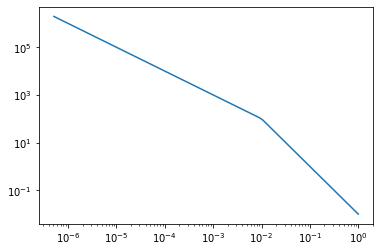

In [21]:
plt.loglog(energies1, model1(energies1))

Now we need a simple power law, starting at E_2 and going up to E_max. But it is important that the two model parts match at E_2, i.e. the value of model1 at E_2 is the same as the value of model2 at E_2. We will achieve this by using E_2 as reference energy and the value of model1 at E_2 as amplitude.

In [26]:
model2 = PowerLaw(amplitude = model1(E_2), e_0 = E_2, alpha = p_3)

This part of the model is defined from E_2 to E_max. Let's define a second energy range:

In [27]:
energies2 = np.logspace(np.log10(E_2.to(u.TeV).value), np.log10(E_max.to(u.TeV).value), 100) *u.TeV

In [28]:
energies2

<Quantity [   1.        ,    1.07226722,    1.149757  ,    1.23284674,
              1.32194115,    1.41747416,    1.51991108,    1.62975083,
              1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
              2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
              3.05385551,    3.27454916,    3.51119173,    3.76493581,
              4.03701726,    4.32876128,    4.64158883,    4.97702356,
              5.33669923,    5.72236766,    6.13590727,    6.57933225,
              7.05480231,    7.56463328,    8.11130831,    8.69749003,
              9.32603347,   10.        ,   10.72267222,   11.49756995,
             12.32846739,   13.21941148,   14.17474163,   15.19911083,
             16.29750835,   17.475284  ,   18.73817423,   20.09233003,
             21.5443469 ,   23.101297  ,   24.77076356,   26.56087783,
             28.48035868,   30.53855509,   32.74549163,   35.11191734,
             37.64935807,   40.37017259,   43.28761281,   46.41588834,
      

Now we make a plot of both components to see if all works well.

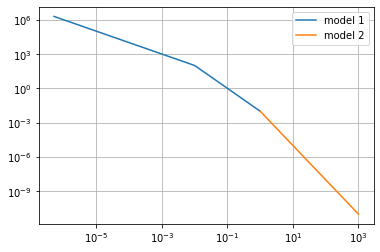

In [30]:
plt.loglog(energies1, model1(energies1), label = 'model 1')
plt.loglog(energies2, model2(energies2), label = 'model 2')

plt.legend()

plt.grid()

Good, this worked. Now we will create two arrays, one for the energies and one for corresponding particle numbers. We achieve this by joining the two arrays we already have. But the last value of model1 and the first value of model2 are exactly the same, we do not want this value twice in our new array. So we start the second part at the second entry which is achieved with [1:] (One means we start with the second entry, the first entry is number 0. No value after the colon means that we go all the way to the end.)

In [43]:
energies = np.hstack([energies1, energies2[1:]])
values = np.hstack([model1(energies1), model2(energies2[1:])])

Let's plot again to see if this worked:

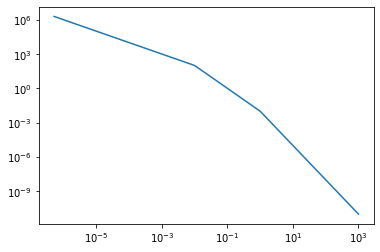

In [44]:
plt.loglog(energies, values)

Finally we create a TableModel with the values we have.

In [45]:
model = TableModel(energies, values)

Let's plot again, just to be sure:

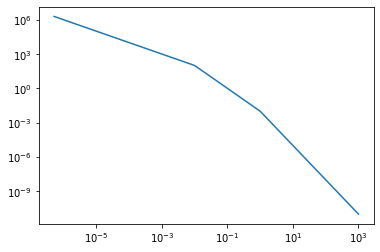

In [47]:
plt.loglog(energies, model(energies))

Good. Now we can use this model as any other model. Do not forget to set the total energy.

In [49]:
sync = Synchrotron(model)

sync.set_We(1e49*u.erg)

(1e+30, 1e+35)

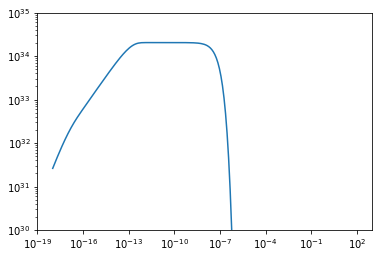

In [54]:
photon_energies = np.logspace(-18, 2, 200) * u.TeV

plt.loglog(photon_energies, sync.sed(photon_energies, distance = 0*u.kpc))

plt.ylim(1e30, 1e35)

## Instructions

Do not copy everything from this notebook! Copy only the parts you need to build the final model. Make sure that you use the correct parameters at the beginning. Use the constructed model in your modeling of the SED of N 157B.